In [1]:
from helpers_image import show, apply_gamma_correction, apply_clahe, img_to_gray
from helpers_config import load_config, save_config
from unet import UNet

import numpy as np

Using TensorFlow backend.
Use token from .telepythrc.


In [2]:
config = load_config()#path="../output/unet/config.json")
#dir_name = datetime.today().strftime("%Y%m%d_%H%M%S")
save_dir = config['dst_path'] + config['model_name'] + "/"

save_dir

'../output/unet_04/'

In [3]:
pipeline = UNet(data_dir=config['data_dir'],
                grayscale=config['grayscale'],
                tr_losses=config['tr_losses'],
                val_losses=config['val_losses'],
                patch_size=config['patch_size'],
                stride=config['stride'],
                telepyth_token=config['telepyth_token'])

In [4]:
X_tr, Y, X_te = pipeline.load_data(overlapping_tr=config['overlapping_tr'],
                                   overlapping_te=config['overlapping_te'],
                                   normalized=config['normalized'],
                                   gamma=config['gamma'],
                                   clahe=config['clahe'],
                                   rotations=config['rotations'],
                                   sample_tr_img=10,#config['sample_tr_img'],
                                   sample_te_img=10)#config['sample_te_img'])

In [10]:
X_tr.shape, Y.shape, X_te.shape

((250, 80, 80, 3), (250, 80, 80, 1), (11560, 80, 80, 3))

In [25]:
np.min(Y)

0

In [6]:
from helpers_image import apply_rotations, revert_rotations

In [7]:
rots = [0, 90, 180]
rotated = apply_rotations(X_tr[:2], rots)

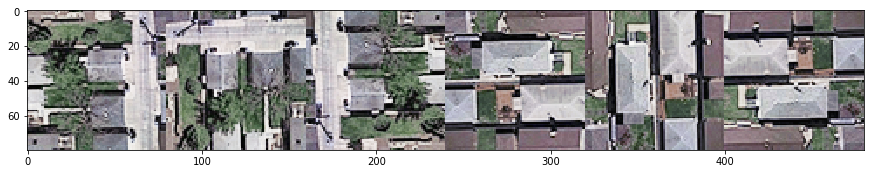

In [8]:
show(rotated)

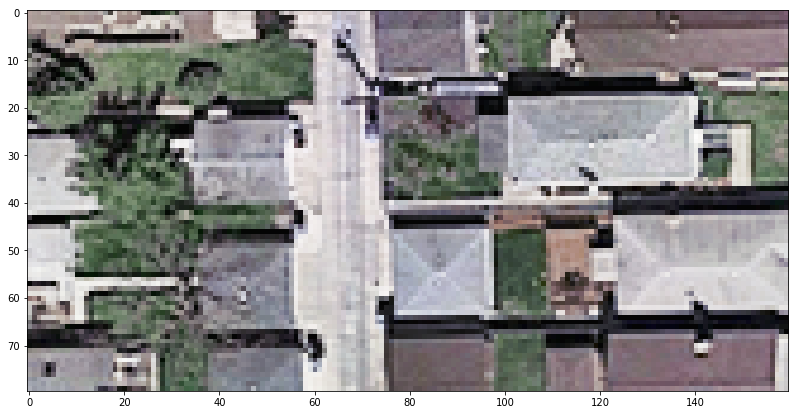

In [9]:
show(revert_rotations(rotated, rots))

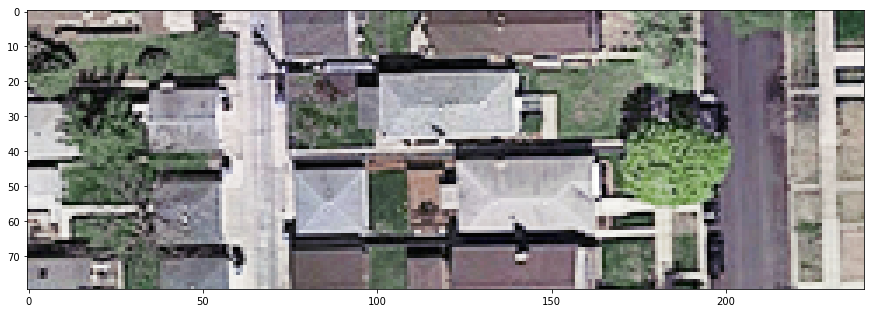

In [12]:
show(X_tr[:3])

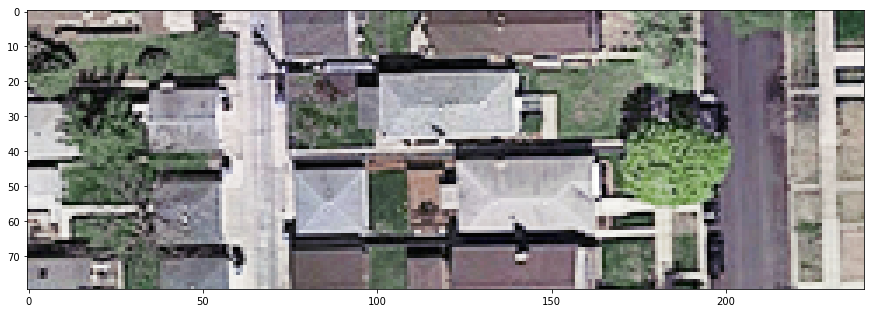

In [11]:
show(X_tr[np.arange(len(X_tr)) % 5 == 0][:3])

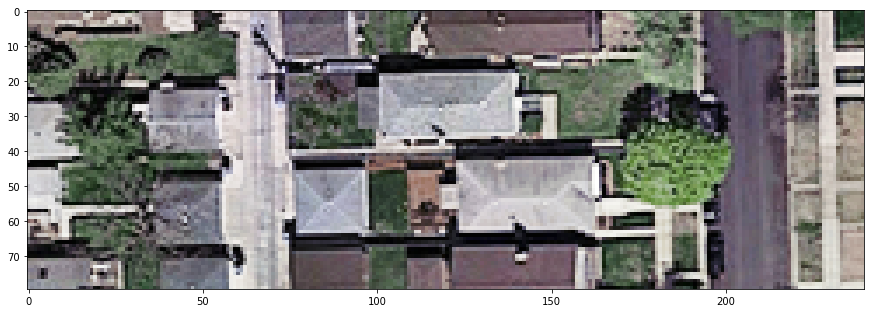

In [6]:
show(X_tr[np.arange(len(X_tr)) % 5 == 0][:3])

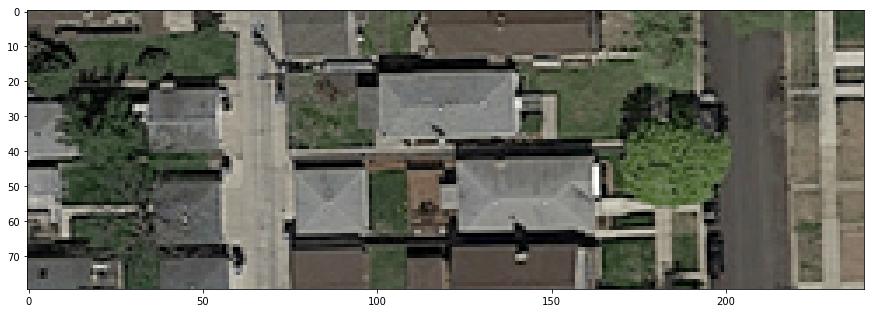

In [8]:
show(X_tr[np.arange(len(X_tr)) % 5 == 0][:3])

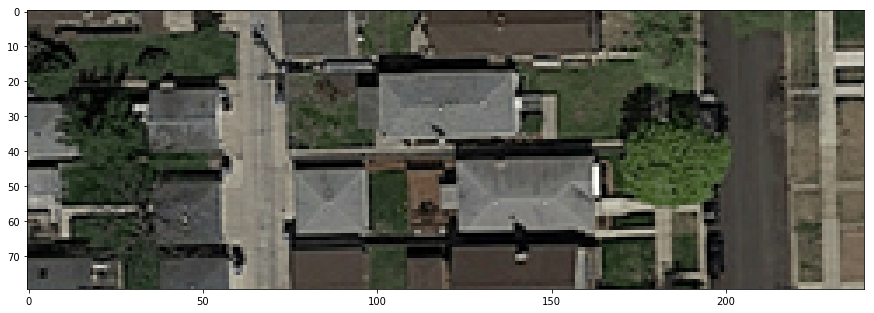

In [41]:
show(X_tr[np.arange(len(X_tr)) % 5 == 0][:3])

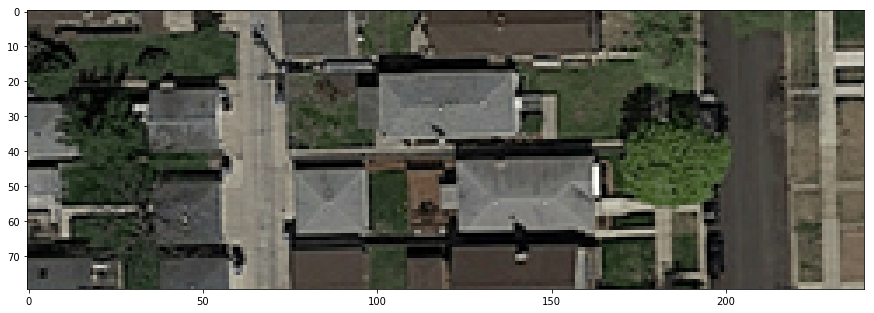

In [35]:
show(X_tr[np.arange(len(X_tr)) % 5 == 0][:3])

In [8]:
img = X_tr[0]

In [9]:
import numpy as np

def gamma_3d(img):
    img_corrected = np.zeros_like(img)
    for c in range(img.shape[2]):
        img_corrected[:, :, c] = (apply_gamma_correction((img[:, :, c] * 255).astype(np.uint8)) / 255).reshape(img.shape[:2])
    return img_corrected

In [10]:
def clahe_3d(img):
    img_corrected = np.zeros_like(img)
    for c in range(img.shape[2]):
        img_corrected[:, :, c] = (apply_clahe((img[:, :, c] * 255).astype(np.uint8), clip_limit=0.0, tile_grid_size=(2, 2)) / 255).reshape(img.shape[:2])
    return img_corrected
    

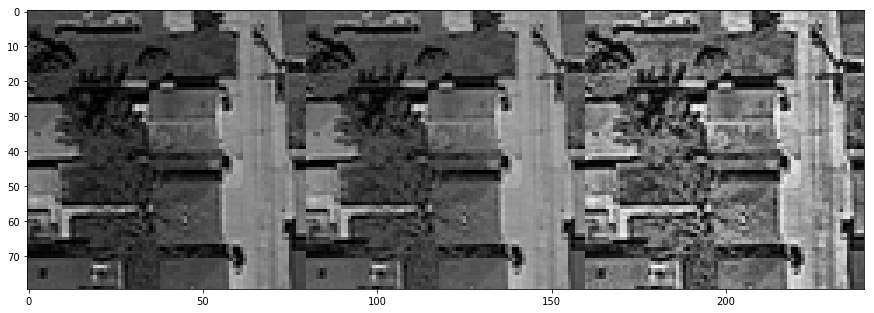

In [11]:
show([img_to_gray(img), apply_gamma_correction((img_to_gray(img) * 255).astype(np.uint8)) / 255,apply_clahe((img_to_gray(img) * 255).astype(np.uint8)) / 255])

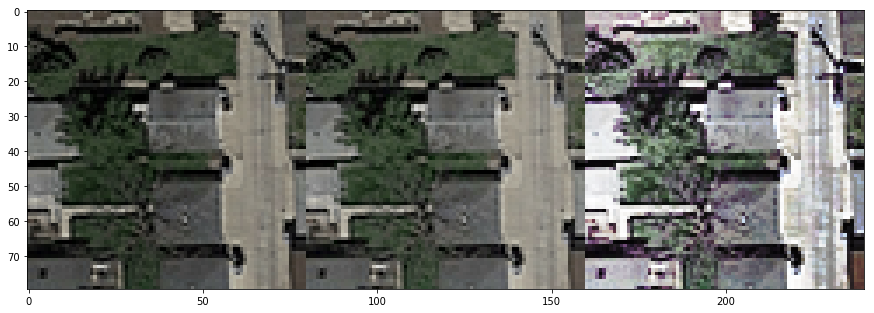

In [13]:
show([img, gamma_3d(img), clahe_3d(img)])

In [14]:
from helpers import image_pipeline

In [15]:
some_images = (X_tr[:10] * 255).astype(np.uint8)

In [16]:
some_images.dtype

dtype('uint8')

In [18]:
image_pipeline(some_images, None, False, True, True, True, [], X_tr.shape[1], None)

ValueError: could not broadcast input array from shape (10,80,80,1) into shape (10,80,80)

In [ ]:
some_images[0].shape